In [2]:
# import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.libqsturng import psturng

### Figure 3G

In [3]:
# load data
data_1 = pd.read_excel('data/Paper1_figure_3G.xls', skiprows=2, sheet_name='Sheet1')
data_2 = pd.read_excel('data/Paper1_figure_3G.xls', skiprows=2, sheet_name='Sheet2')
data_3 = pd.read_excel('data/Paper1_figure_3G.xls', skiprows=2, sheet_name='Sheet3')
data_4 = pd.read_excel('data/Paper1_figure_3G.xls', skiprows=2, sheet_name='Sheet4')

data_1


,IgG2b,anti-CD4,anti-CD8
0,12.334,11.063,4.859
1,10.017,11.238,5.842
2,10.054,11.598,6.592
3,7.440,11.355,6.613
4,10.090,11.986,NaN
5,9.682,11.210,NaN
6,10.049,NaN,NaN


In [4]:
# PLOT FUNCTION
def plot_1(data, fig, axes):
    for i in range(3):
        axes.scatter(1*np.ones(len(data['IgG2b'])), 
                     data['IgG2b'], 
                     color='#000000')
        axes.scatter(2*np.ones(len(data['anti-CD4'])), 
                     data['anti-CD4'], 
                     color='#2c51b0')
        axes.scatter(3*np.ones(len(data['anti-CD8'])), 
                     data['anti-CD8'], 
                     color='#eb4034')

    # the error bars
    axes.bar(1,
            height=np.mean(data['IgG2b']),
            yerr=np.std(data['IgG2b']),    # error bars
            capsize=15, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )

    axes.bar(2,
            height=np.mean(data['anti-CD4']),
            yerr=np.std(data['anti-CD4']),    # error bars
            capsize=15, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )      

    axes.bar(3,
            height=np.mean(data['anti-CD8']),
            yerr=np.std(data['anti-CD8']),    # error bars
            capsize=15, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )    

    # more parameters
    axes.set_xlim([0.5, 3.5])
    axes.set_xticks([1, 2, 3], ['IgG2b', 'anti-CD4', 'anti-CD8'])
    fig.set_size_inches([13, 3])

def mann_whitney(data):
    (t, p_val_1) = stats.mannwhitneyu(data['IgG2b'], data['anti-CD4'], nan_policy='omit')
    (t, p_val_2) = stats.mannwhitneyu(data['IgG2b'], data['anti-CD8'], nan_policy='omit')
    print(f'anti-CD4 => {p_val_1:0.3f} & anti-CD8 => {p_val_2:0.3f}')
        
    

Text(2.8, 2.7, '*')

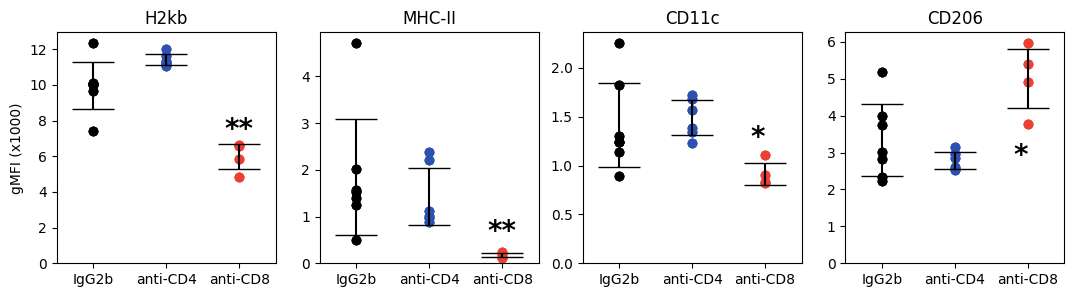

In [5]:
# DRIVER CODE

# declare axes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

# plot 1
plot_1(data_1, fig, ax1)
ax1.set_title('H2kb')
ax1.set_ylabel('gMFI (x1000)')
ax1.text(2.80, 7, '**', size=20, fontweight='bold')
plot_1(data_3, fig, ax2)
ax2.set_title('MHC-II')
ax2.text(2.80, 0.5, '**', size=20, fontweight='bold')
plot_1(data_4, fig, ax3)
ax3.set_title('CD11c') 
ax3.text(2.80, 1.2, '*', size=20, fontweight='bold')
plot_1(data_2, fig, ax4)
ax4.set_title('CD206')
ax4.text(2.80, 2.7, '*', size=20, fontweight='bold')



In [6]:
# do Mann-Whitney test for H2kb
mann_whitney(data_1)

anti-CD4 => 0.035 & anti-CD8 => 0.006


In [7]:
# do Mann-Whitney test for MHC-II
mann_whitney(data_3)

anti-CD4 => 0.534 & anti-CD8 => 0.006


In [8]:
# do Mann-Whitney test for CD11c
mann_whitney(data_4)

anti-CD4 => 0.445 & anti-CD8 => 0.024


In [9]:
# do Mann-Whitney test for CD206
mann_whitney(data_2)

anti-CD4 => 0.534 & anti-CD8 => 0.042


### Figure 5A

In [10]:
# FUNCTION
def plot_2(data, fig, axes, title):
    color = '#eb4034'
    for i in range(3):
        axes.scatter(1*np.ones(len(data['BMDC'])), 
                data['BMDC'], 
                color=color)
        axes.scatter(2*np.ones(len(data['TAM'])), 
                data['TAM'], 
                color=color)
        axes.scatter(3*np.ones(len(data['CD103+ DC'])), 
                data['CD103+ DC'], 
                color=color)
        axes.scatter(4*np.ones(len(data['TAM.1'])), 
                data['TAM.1'], 
                color=color)
        axes.scatter(5*np.ones(len(data['CD103+ DC.1'])), 
                data['CD103+ DC.1'], 
                color=color)

    # the error bars
    axes.bar(1,
            height=np.mean(data['BMDC']),
            yerr=np.std(data['BMDC']),    # error bars
            capsize=10, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )

    axes.bar(2,
        height=np.mean(data['TAM']),
        yerr=np.std(data['TAM']),    # error bars
        capsize=10, # error bar cap width in points
        color=(0, 0, 0, 0),  # face color transparent
        edgecolor=(0, 0, 0, 0),
        )      

    axes.bar(3,
            height=np.mean(data['CD103+ DC']),
            yerr=np.std(data['CD103+ DC']),    # error bars
            capsize=7, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            ) 
    axes.bar(4,
            height=np.mean(data['TAM.1']),
            yerr=np.std(data['TAM.1']),    # error bars
            capsize=7, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )      
    axes.bar(5,
            height=np.mean(data['CD103+ DC.1']),
            yerr=np.std(data['CD103+ DC.1']),    # error bars
            capsize=7, # error bar cap width in points
            color=(0, 0, 0, 0),  # face color transparent
            edgecolor=(0, 0, 0, 0),
            )      


    # more parameters
    # axes.set_xlim([0.5, 5])
    axes.set_xticks([1, 2, 3, 4, 5], ['BMDC', 'TAM', 'CD103+ DC', 'TAM.1', 'CD103+ DC.1'])
    axes.tick_params(axis='x', labelrotation=55)  
    axes.set_title(title)
    fig.set_size_inches([13, 3])

In [11]:
# load data
data_1 = pd.read_excel('data/Paper1_figure_5A.xls', sheet_name='Sheet1', skiprows=2)
data_2 = pd.read_excel('data/Paper1_figure_5A.xls', sheet_name='Sheet2', skiprows=2)
data_3 = pd.read_excel('data/Paper1_figure_5A.xls', sheet_name='Sheet3', skiprows=2)
data_4 = pd.read_excel('data/Paper1_figure_5A.xls', sheet_name='Sheet4', skiprows=2)


# print data


In [58]:

# tests function
def tests_for_two(data):
    group_1 = data['BMDC'].dropna()
    group_2 = data['TAM'].dropna()
    group_3 = data['CD103+ DC'].dropna()

    # do levene test
    (W_val, p_val) = stats.levene(group_1, group_2, group_3)
    if p_val < 0.05:
        print(f'The p-value of the Levene test is < 0.05: p = {p_val:0.3f}. Therefore, we reject the null hypothesis that the three groups have an equal variance.')

    # do one-way ANOVA
    F_statistic, p_val = stats.f_oneway(group_1, group_2, group_3)
    if p_val < 0.05:
        print('Since p-value from one-way ANOVA is < 0.05, one of the groups is significantly different.')

    merged = data.stack().reset_index().drop(columns='level_0').rename(columns={'level_1': 'Type', 0:'Expression'})

    # #Then, do the multiple testing
    multiComp = MultiComparison(merged['Expression'], merged['Type'])
        
    # checkVal = Holm_Bonferroni(multiComp)  # Alternatives to Tukey's HSD test
    print('Then, we move on to the multi-comparison to determine which groups are different.')
    print(multiComp.tukeyhsd().summary())


In [59]:
# run tests
tests_for_two(data_1)
tests_for_two(data_2)
tests_for_two(data_3)
tests_for_two(data_4)

The p-value of the Levene test is < 0.05: p = 0.008. Therefore, we reject the null hypothesis that the three groups have an equal variance.
Since p-value from one-way ANOVA is < 0.05, one of the groups is significantly different.
Then, we move on to the multi-comparison to determine which groups are different.
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
       BMDC   CD103+ DC   1.9739  0.003  0.5476  3.4002   True
       BMDC CD103+ DC.1   0.0698    1.0 -1.6178  1.7575  False
       BMDC         TAM    2.123    0.0  1.2209   3.025   True
       BMDC       TAM.1   0.4764 0.6257  -0.498  1.4507  False
  CD103+ DC CD103+ DC.1   -1.904 0.0719 -3.9211  0.1131  False
  CD103+ DC         TAM   0.1491 0.9981 -1.2772  1.5754  False
  CD103+ DC       TAM.1  -1.4975 0.0448 -2.9706 -0.0244   True
CD103+ DC.1         TAM   2.0531 0.0108  0.3655  3.7407   

Text(2.7, 2.2, '***')

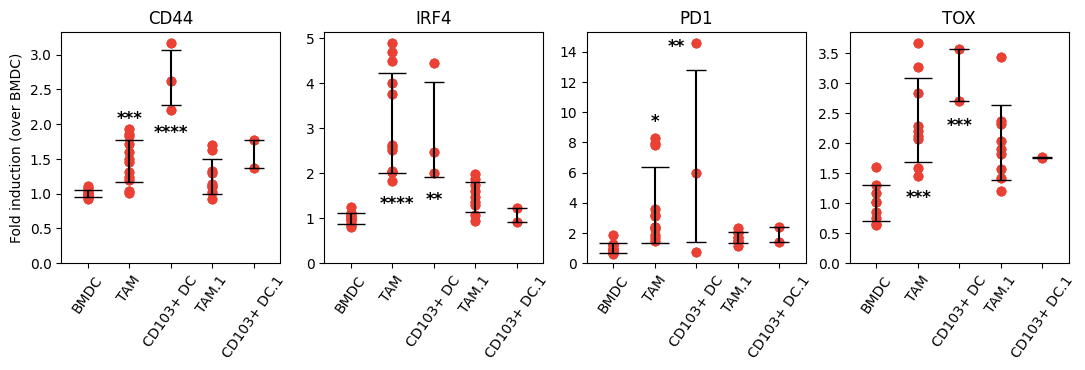

In [130]:
# declare axes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

# plot 2
plot_2(data_1, fig, ax2, 'IRF4')
ax2.text(1.7, 1.2, '****', size=12, fontweight='bold')
ax2.text(2.8, 1.3, '**', size=12, fontweight='bold')
plot_2(data_2, fig, ax3, 'PD1')
ax3.text(1.9, 9, '*', size=12, fontweight='bold')
ax3.text(2.3, 14, '**', size=12, fontweight='bold')
plot_2(data_3, fig, ax1, 'CD44')
ax1.set_ylabel('Fold induction (over BMDC)')
ax1.text(1.7, 2.0, '***', size=12, fontweight='bold')
ax1.text(2.6, 1.8, '****', size=12, fontweight='bold')
plot_2(data_4, fig, ax4, 'TOX')
ax4.text(1.7, 1.0, '***', size=12, fontweight='bold')
ax4.text(2.7, 2.2, '***', size=12, fontweight='bold')


### Figure 5G

In [75]:
# load data
data = pd.read_excel('data/Paper1_figure_5C.xls', skiprows=2, index_col=0).T
o2_21 = pd.DataFrame(data[:4])
o2_15 = pd.DataFrame(data[4:])
# print data
o2_15

,BMDC,BMDC+SL8,TAM_B16ChOVA,2x TAM_B16ChOVA,TAM_B16F10,2x TAM_B16F10
1.5% O2,5.42,33.9,1.86,8.08,0.20,0.26
Unnamed: 6,0.30,36.1,1.82,9.66,0.24,0.24
Unnamed: 7,0.25,35.8,3.95,4.03,0.20,2.14
Unnamed: 8,0.18,36.5,3.25,NaN,0.17,0.78


In [78]:
for i in o2_15.columns[1:]:
   t_statistic, p_val = stats.ttest_ind(o2_15['BMDC'], o2_15[i].dropna()) 
   if p_val < 0.05:
        print(f'Since the p-value of {i} is {p_val:0.3f}, this group is significant.')

Since the p-value of BMDC+SL8 is 0.000, this group is significant.
Since the p-value of 2x TAM_B16ChOVA is 0.040, this group is significant.


Text(6.5, 10, '*')

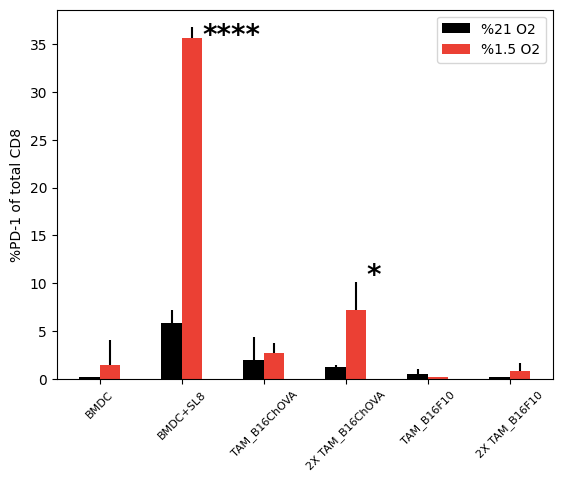

In [87]:
# declare figure and axes
fig, ax = plt.subplots()
x_locs = np.arange(0, 12, 2)
# ax.set_yscale("log", nonpositive='clip')

# 21% O2 plot
ax.bar(
    x_locs-0.25,
    o2_21.mean(),
    yerr=[np.zeros(6), o2_21.std()],
    # error_kw={zorder:0}
    width=0.5,
    color='#000000',
    label='%21 O2'
)

# 1.5% O2 plot
ax.bar(
    x_locs+0.25,
    o2_15.mean(),
    yerr=[np.zeros(6), o2_15.std()],
    width=0.5,
    color='#eb4034',
    label='%1.5 O2'
)

# more params
ax.set_xticks(x_locs, ['BMDC', 'BMDC+SL8', 'TAM_B16ChOVA', '2X TAM_B16ChOVA', 'TAM_B16F10', '2X TAM_B16F10'], size=8)
ax.set_ylabel('%PD-1 of total CD8')
ax.legend()
ax.tick_params(axis='x', labelrotation=45)  
ax.text(2.5, 35, '****', size=20, fontweight='bold')
ax.text(6.5, 10, '*', size=20, fontweight='bold')

# fig.set_size_inches([13, 3])